<a href="https://colab.research.google.com/github/SergiiRv/first/blob/master/NEURON_LAb3_SergiiRomanenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neuron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 16.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!unzip /content/drive/MyDrive/mods.zip

Archive:  /content/drive/MyDrive/mods.zip
   creating: mods/
  inflating: mods/cad.mod            
  inflating: mods/ca.mod             
  inflating: mods/kca.mod            
  inflating: mods/km.mod             
  inflating: mods/kv.mod             
  inflating: mods/na.mod             


In [4]:
!nrnivmodl mods

/content
Mod files: "mods/mods/cad.mod" "mods/mods/ca.mod" "mods/mods/kca.mod" "mods/mods/km.mod" "mods/mods/kv.mod" "mods/mods/na.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../mods/cad.mod
 -> NMODL ../mods/ca.mod
 -> NMODL ../mods/kca.mod
Translating cad.mod into /content/x86_64/cad.c
Translating kca.mod into /content/x86_64/kca.c
Thread Safe
Translating ca.mod into /content/x86_64/ca.c
Thread Safe
Thread Safe
 -> NMODL ../mods/km.mod
 -> NMODL ../mods/kv.mod
 -> NMODL ../mods/na.mod
Translating km.mod into /content/x86_64/km.c
Thread Safe
Translating na.mod into /content/x86_64/na.c
Translating kv.mod into /content/x86_64/kv.c
Thread Safe
 -> Compiling cad.c
 -> Compiling ca.c
Thread Safe
 -> Compiling kca.c
 -> Compiling km.c
 -> Compiling kv.c
 -> Compiling na.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special


In [6]:
%matplotlib inline
from numpy import *
from numpy import random as rnd
from matplotlib.pyplot import *
from neuron import h
import seaborn as sns
import pandas as pd

In [7]:
h.dt = 0.05

In [11]:
h.celsius = 37
class neuron:
  def __init__(self, excsyn: bool, inhsyn:bool):
    self.dend = h.Section()
    self.Ra = copy(self.dend.Ra)
    self.dend.diam = 10/pi
    self.dend.nseg = 1
    self.axon = h.Section()
    self.axon.nseg = 1
    self.axon.diam = 10/pi
    self.axon.L = 10
    self.axon.connect(self.dend(1), 0)

    for ionch in 'na km kca ca cad pas'.split():
      self.dend.insert(ionch)

    for ionch in 'na', 'kv':
      self.axon.insert(ionch)

    self.dend.cm = 0.75
    self.axon.cm = 0.75

    self.axon.ek = -90
    self.dend.ek = -90
    self.dend.ena = 60
    self.axon.ena = 60
    self.dend.eca = 140

    self.dend.g_pas =1/30000
    self.dend.e_pas = -70
    self.dend.gbar_na = 15
    self.dend.gbar_ca = 0.3
    self.dend.gbar_km = 0.1
    self.dend.gbar_kca = 3

    self.axon.gbar_na = 30000
    self.axon.gbar_kv = 1500

  def set(self, rho:float = 160, kappa:float = 30):
    self.dend.L = rho*self.axon.L
    self.dend.Ra = self.Ra*kappa/h.ri(0.5, sec = self.dend)






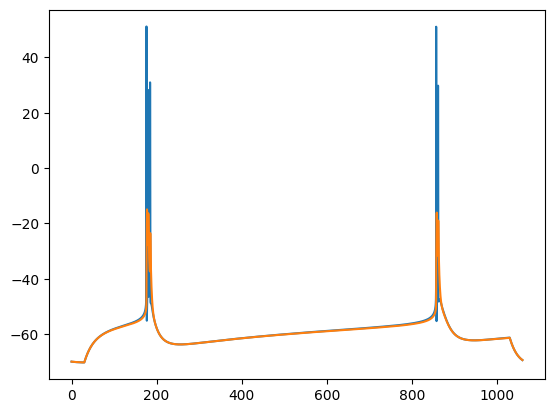

In [13]:
n = neuron(False, False)
#n.set(rho =160, kappa = 30)
n.set(rho = 260, kappa = 8)

va, vd = h.Vector(), h.Vector()
va.record(n.axon(0.5)._ref_v, sec = n.axon)
vd.record(n.dend(0.5)._ref_v, sec = n.dend)

ic = h.IClamp(0.5, n.dend, sec = n.dend)
ic.delay = 30
ic.dur = 1000
ic.amp = 0.1

h.finitialize(-70)
h.fcurrent()
h.frecord_init()

h.t = 0

while h.t < 1060: h.fadvance()

va = array(va)
vd = array(vd)
vt = arange(va.shape[0])*h.dt
plot(vt, va, "-", label = "axon")
plot(vt, vd, "-", label = "dend")
